# Network Analysis

Comparing different pretrained models in terms of accuracy and performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
df = pd.read_csv("networks.csv")
df["Weight"] = df["Weight"].apply(lambda x: x.split(".")[0].replace("_Weights", "").replace("_", " "))
df = df[np.invert(df.duplicated(subset="Weight"))]
df.head()

,Weight,Acc@1,Acc@5,Params,GFLOPS
0,AlexNet,56.522,79.066,61100000.0,0.71
1,ConvNeXt Base,84.062,96.870,88600000.0,15.36
2,ConvNeXt Large,84.414,96.976,197800000.0,34.36
3,ConvNeXt Small,83.616,96.650,50200000.0,8.68
4,ConvNeXt Tiny,82.520,96.146,28600000.0,4.46


In [8]:
df.nlargest(10, "Acc@5").nsmallest(5, "GFLOPS")

,Weight,Acc@1,Acc@5,Params,GFLOPS
20,EfficientNet V2 S,84.228,96.878,21500000.0,8.37
1,ConvNeXt Base,84.062,96.870,88600000.0,15.36
16,EfficientNet B6,84.008,96.916,43000000.0,19.07
89,Swin V2 B,84.112,96.864,87900000.0,20.32
19,EfficientNet V2 M,85.112,97.156,54100000.0,24.58


In [9]:
noi = df.nlargest(10, "Acc@5").nsmallest(5, "GFLOPS")["Weight"].tolist()
noi.append("ResNet50")
noi.append("AlexNet")
noi.append("Inception V3")
noi

['EfficientNet V2 S',
 'ConvNeXt Base',
 'EfficientNet B6',
 'Swin V2 B',
 'EfficientNet V2 M',
 'ResNet50',
 'AlexNet',
 'Inception V3']

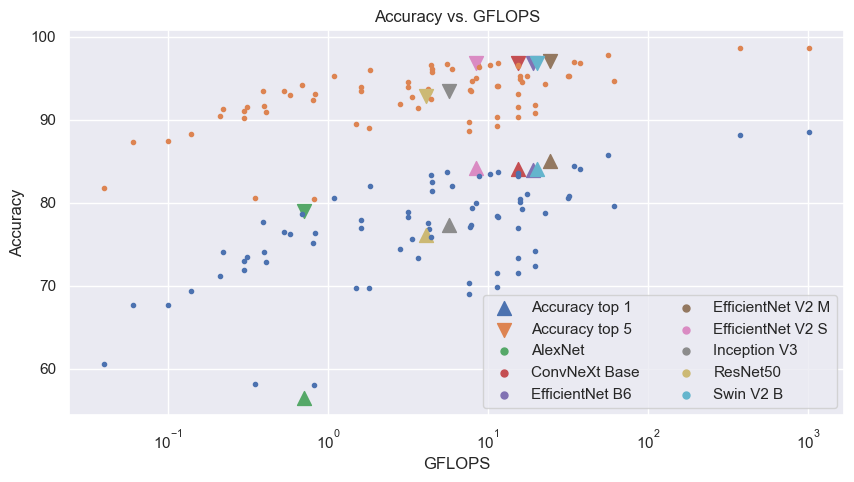

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

first = True

scatter_best = []
scatter_rest = []

col_id = 2

for idx, row in df.iterrows():
    if row["Weight"] in noi:
        line = ax.scatter(row['GFLOPS'], row['Acc@1'], marker='.', label=row["Weight"], color=f"C{col_id}", s=1)
        ax.scatter(row['GFLOPS'], row['Acc@1'], marker='^', label=row["Weight"], color=f"C{col_id}", s=100)
        ax.scatter(row['GFLOPS'], row['Acc@5'], marker='v', color=f"C{col_id}", s=100)
        scatter_best.append(line)
        col_id += 1
    else:
        if first:
            a = ax.scatter(row['GFLOPS'], row['Acc@1'], marker='^', color=f"C0", label="Accuracy top 1", s=1)
            b = ax.scatter(row['GFLOPS'], row['Acc@5'], marker='v', color=f"C1", label="Accuracy top 5", s=1)
            scatter_rest = [a,b]
            first = False
            
        ax.scatter(row['GFLOPS'], row['Acc@1'], marker='.', color=f"C0")
        ax.scatter(row['GFLOPS'], row['Acc@5'], marker='.', color=f"C1")

scatter = scatter_rest + scatter_best
ax.set_xscale("log")
ax.set_title("Accuracy vs. GFLOPS")
ax.legend(handles=scatter, ncols=2, markerscale=10)
ax.set_xlabel("GFLOPS")
ax.set_ylabel("Accuracy")

plt.savefig("figures/network/networks.png")
plt.show()